# 전이학습(Transfer Learning)

- 대규모 데이터셋에서 사전 훈련된 모델을 선택 -> 이 모델의 지식을 새로운 작업에 '전이'

In [ ]:
# 이미 학습이 잘 되어있는 모델에서 가중치 값을 가져와서 씀
# 학습을 하려고 하는데 갖고있는 데이터가 작은경우
# 전체모델에서 일부분만 재학습 / 핵심부분은 그대로 가져와서 사용

# 파인튜닝(Fine Tunning) - 전이학습 기법 중 하나
# - 사전 훈련된 모델을 새로운 작업에 맞게 미세 조정
# - 1. 다시 재학습 (본인 데이터가 많은 경우 사용)
# - 2. 모델의 상단 부분을 frozen (비슷한 큰 특징들은 그대로 사용)
# - 3. 분류기 부분만 바꿔서 쓰기 (본인 데이터가 적을 경우)

In [3]:
import torch
import torch.nn as nn
from torchvision import models

## resnet 을 이용한 파인튜닝

In [4]:
model = models.resnet34(pretrained=True)
model

c:\deep_learning\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\deep_learning\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:03<00:00, 27.9MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

- 파인튜닝 case3. 모든걸 frozen 시키고(가중치는 그대로), 분류기만 사용

In [ ]:
for param in model.parameters() :
    print(param)
# requires_grad=True : 미분한 기울기값 가지고 있겠다

Parameter containing:
tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
            3.0660e-02,  2.5398e-02],
          [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
            2.9754e-02,  4.1735e-02],
          [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
           -1.1601e-01, -1.2191e-01],
          ...,
          [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
            2.4631e-03,  1.6726e-02],
          [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
            7.3973e-02,  5.9085e-02],
          [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
            8.3749e-02,  9.6970e-02]],

         [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
            2.5483e-02,  2.4275e-02],
          [ 5.3961e-02,  4.4677e-02,  3.4326e-02,  ...,  1.3392e-02,
            1.9135e-02,  3.7995e-02],
          [ 1.0251e-03, -5.4513e-02, -1.0225e-01,  ..., -1.9231e-01,
           -1.9994e-01, -1.8192e-01]

In [7]:
for param in model.parameters() :
    param.requires_grad=False

In [ ]:
for param in model.parameters() :
    print(param)
# requires_grad 항목이 없어짐

Parameter containing:
tensor([[[[ 5.4109e-03, -6.9092e-03,  7.8839e-03,  ...,  4.9072e-02,
            3.0660e-02,  2.5398e-02],
          [ 4.1081e-02,  3.1296e-02,  3.2265e-02,  ...,  3.3145e-02,
            2.9754e-02,  4.1735e-02],
          [ 4.9519e-03, -3.1705e-02, -6.1310e-02,  ..., -9.7493e-02,
           -1.1601e-01, -1.2191e-01],
          ...,
          [-1.2287e-02, -2.4841e-02, -9.3052e-03,  ...,  1.7113e-02,
            2.4631e-03,  1.6726e-02],
          [ 3.9117e-03,  4.4537e-03,  3.6315e-02,  ...,  1.0371e-01,
            7.3973e-02,  5.9085e-02],
          [ 1.6784e-02,  8.8902e-03,  3.1312e-02,  ...,  9.6964e-02,
            8.3749e-02,  9.6970e-02]],

         [[-7.7192e-03, -8.7711e-03,  1.4143e-02,  ...,  3.3901e-02,
            2.5483e-02,  2.4275e-02],
          [ 5.3961e-02,  4.4677e-02,  3.4326e-02,  ...,  1.3392e-02,
            1.9135e-02,  3.7995e-02],
          [ 1.0251e-03, -5.4513e-02, -1.0225e-01,  ..., -1.9231e-01,
           -1.9994e-01, -1.8192e-01]

In [11]:
model.fc = nn.Linear(512, 2)

In [14]:
# (layer1) 부분만 얼리고 싶다
for param in model.layer1.parameters() :
    param.requires_grad = False

## 연예인 분류기

In [20]:
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...


In [ ]:
# dataset 가져올때 폴더 구조

#                    (내가 맞히고 싶은 클래스로 분류)
# dataset   - train - 마동석
#                   - 카리나
#                   - 이국주
#           - test  - 마동석
#                   - 카리나
#                   - 이국주

### 1. 데이터 수집

In [7]:
import os
import shutil

# 폴더 생성
directory_list = [
    "dataset/train/",
    "dataset/test/"
]

for dir in directory_list :
    os.makedirs(dir)

In [1]:
from bing_image_downloader.bing_image_downloader import downloader

In [ ]:
from bing_image_downloader.bing_image_downloader import downloader

# 이미지 다운로드 받아오기
# force_replace : 똑같은 이미지 덮어쓰기 (-> True로 하면 개수가 부족해짐..)
downloader.download(query="마동석", limit=50, output_dir="./", adult_filter_off=True, force_replace=False, timeout=60)
downloader.download(query="카리나", limit=50, output_dir="./", adult_filter_off=True, force_replace=False, timeout=60)
downloader.download(query="공명", limit=50, output_dir="./", adult_filter_off=True, force_replace=False, timeout=60)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://image.xportsnews.com/contents/images/upload/article/2022/1128/1669621507974521.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://cdn.newsculture.press/news/photo/202304/522360_644372_548.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/originals/b9/33/b1/b933b16a5f68988447c475aee3562e06.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2022/11/17/30000804359_1280.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2023/05/09/30000845947_1280.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img.extmovie.com/files/attach/images/135/397/529/075/7edeef3b18761bda9bb70af3152bd379.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/05/14/5tjArQ2TYQ7Y636934517816837543.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://cdn.mhnse.com/news/photo/202305/185023_185270_5154.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (h

In [ ]:
# train/test 나눠서 데이터 폴더에 옮기기
def dataset_split(query, train_cnt) :       # 카리나, 30
    for dir in directory_list :             # dir - dataset/train/
        if not os.path.isdir(dir + query) :
            os.makedirs(dir + query)        # dataset/train/카리나
    
    cnt = 0

    for file_name in os.listdir(query) :
        if cnt < train_cnt :
            shutil.move(query + "/" + file_name, "dataset/train/"+query+"/"+file_name)
        else :
            shutil.move(query + "/" + file_name, "dataset/test/"+query+"/"+file_name)
        cnt += 1
    shutil.rmtree(query)        # 디렉토리 삭제

In [12]:
dataset_split("카리나", 40)
dataset_split("마동석", 40)
dataset_split("공명", 40)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

In [31]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_datasets = datasets.ImageFolder(root="dataset/train", transform=transforms_train)
test_datasets = datasets.ImageFolder(root="dataset/test", transform=transforms_test)

# 가져올때 train 폴더 안 공명, 마동석, 카리나를 각각 공명폴더에서 들고오면 0, 마동석폴더 :1, 카리나폴더:2 가져옴

In [32]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 120
    Root location: dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [33]:
test_datasets

Dataset ImageFolder
    Number of datapoints: 30
    Root location: dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [34]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True)

In [ ]:
next(iter(train_dataloader))

[tensor([[[[ 1.7352,  1.7352,  1.7352,  ..., -0.9363, -0.9534, -0.9534],
           [ 1.7352,  1.7352,  1.7352,  ..., -0.9534, -0.9363, -0.9363],
           [ 1.7352,  1.7352,  1.7352,  ..., -0.9534, -0.9363, -0.9534],
           ...,
           [-0.8507, -0.9020, -0.9877,  ..., -0.9705, -1.1247, -1.1247],
           [-0.8335, -0.9192, -0.9705,  ..., -0.9705, -1.1932, -1.0904],
           [-0.8164, -0.9020, -0.9363,  ..., -1.0904, -1.2274, -1.0562]],
 
          [[ 1.9034,  1.9034,  1.8859,  ..., -0.8452, -0.8627, -0.8452],
           [ 1.8859,  1.9034,  1.9034,  ..., -0.8627, -0.8452, -0.8452],
           [ 1.9034,  1.9034,  1.9034,  ..., -0.8627, -0.8627, -0.8452],
           ...,
           [-0.6877, -0.7577, -0.8627,  ..., -0.8277, -0.9503, -0.9853],
           [-0.7227, -0.8102, -0.8627,  ..., -0.8452, -1.0728, -0.9853],
           [-0.7052, -0.7752, -0.7927,  ..., -0.9678, -1.1078, -0.9503]],
 
          [[ 2.3263,  2.3263,  2.3263,  ..., -0.5670, -0.5670, -0.5670],
           [ 

In [37]:
import matplotlib.pyplot as plt

# 이미지를 화면에 출력하는 함수
def imshow(img, title) :
    img = img.numpy().transpose([1, 2, 0])

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    img = img * std + mean      # 원래 이미지로 복구
    img = np.clip(img, 0, 1)    # 해도되고, 안해도되고

    plt.imshow(img)
    plt.title(title)
    plt.show()

In [ ]:
images, labels = next(iter(train_dataloader))
images.shape
# [3, 224, 224] -> 4개(batch_size=4)

torch.Size([4, 3, 224, 224])

In [41]:
images[0].shape

torch.Size([3, 224, 224])

In [ ]:
images_data = torchvision.utils.make_grid(images)   # 4개의 그림을 한번에 그려줌 (배치단위로 묶어서 출력)

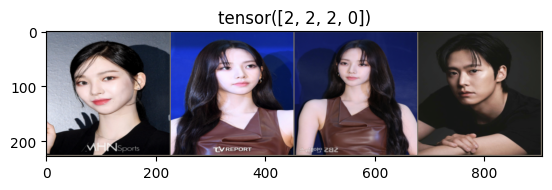

In [43]:
imshow(images_data, labels)

In [44]:
train_datasets.classes

['공명', '마동석', '카리나']

### 2. 모델 불러오기

- 데이터가 적다 -> 전이학습 하는것이 효율적

In [45]:
model = models.resnet34(pretrained=True)
model

c:\deep_learning\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\deep_learning\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 앞에는 frozen, 분류기(fc)부분만 변경
for param in model.parameters() :
    param.requires_grad = False

model.fc = nn.Linear(in_features=512, out_features=3, bias=True)

In [48]:
from tensorboardX import SummaryWriter
import tqdm

writer = SummaryWriter()

optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 50

step = 0

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

for epoch in range(epochs) :
    for data, labels in tqdm.tqdm(train_dataloader) :
        optimizer.zero_grad()
        pred = model(data.to(device))
        loss = criterion(pred, labels.to(device))
        writer.add_scalar("Loss/train", loss.item(), step)
        loss.backward()
        optimizer.step()
        step += 1
    
    print(f"loss ::: {loss.item()}")

100%|██████████| 30/30 [00:09<00:00,  3.10it/s]


loss ::: 1.0643645524978638


100%|██████████| 30/30 [00:08<00:00,  3.38it/s]


loss ::: 0.6784809827804565


100%|██████████| 30/30 [00:08<00:00,  3.45it/s]


loss ::: 1.4642122983932495


100%|██████████| 30/30 [00:08<00:00,  3.52it/s]


loss ::: 1.2903012037277222


100%|██████████| 30/30 [00:08<00:00,  3.38it/s]


loss ::: 0.5894116163253784


100%|██████████| 30/30 [00:08<00:00,  3.35it/s]


loss ::: 0.5334283709526062


100%|██████████| 30/30 [00:09<00:00,  3.10it/s]


loss ::: 0.8059900403022766


100%|██████████| 30/30 [00:09<00:00,  3.27it/s]


loss ::: 0.8045946359634399


100%|██████████| 30/30 [00:09<00:00,  3.16it/s]


loss ::: 0.18524087965488434


100%|██████████| 30/30 [00:10<00:00,  2.81it/s]


loss ::: 0.1596183478832245


100%|██████████| 30/30 [00:09<00:00,  3.01it/s]


loss ::: 0.48869788646698


100%|██████████| 30/30 [00:10<00:00,  2.91it/s]


loss ::: 0.23490437865257263


100%|██████████| 30/30 [00:10<00:00,  2.94it/s]


loss ::: 0.10009890794754028


100%|██████████| 30/30 [00:10<00:00,  2.96it/s]


loss ::: 1.817849040031433


100%|██████████| 30/30 [00:09<00:00,  3.06it/s]


loss ::: 0.3130280375480652


100%|██████████| 30/30 [00:09<00:00,  3.02it/s]


loss ::: 0.17256313562393188


100%|██████████| 30/30 [00:09<00:00,  3.25it/s]


loss ::: 0.10117853432893753


100%|██████████| 30/30 [00:08<00:00,  3.35it/s]


loss ::: 0.18760083615779877


100%|██████████| 30/30 [00:08<00:00,  3.48it/s]


loss ::: 0.2963622808456421


100%|██████████| 30/30 [00:08<00:00,  3.43it/s]


loss ::: 0.33564093708992004


100%|██████████| 30/30 [00:08<00:00,  3.41it/s]


loss ::: 0.1359976828098297


100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


loss ::: 0.47980624437332153


100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


loss ::: 0.4739868640899658


100%|██████████| 30/30 [00:09<00:00,  3.33it/s]


loss ::: 0.26684892177581787


100%|██████████| 30/30 [00:09<00:00,  3.22it/s]


loss ::: 0.09366273880004883


100%|██████████| 30/30 [00:08<00:00,  3.34it/s]


loss ::: 0.16526570916175842


100%|██████████| 30/30 [00:08<00:00,  3.46it/s]


loss ::: 0.14313629269599915


100%|██████████| 30/30 [00:08<00:00,  3.58it/s]


loss ::: 1.331823706626892


100%|██████████| 30/30 [00:08<00:00,  3.39it/s]


loss ::: 0.04967935010790825


100%|██████████| 30/30 [00:08<00:00,  3.40it/s]


loss ::: 0.039412204176187515


100%|██████████| 30/30 [00:09<00:00,  3.20it/s]


loss ::: 0.027528520673513412


100%|██████████| 30/30 [00:09<00:00,  3.25it/s]


loss ::: 0.3675971031188965


100%|██████████| 30/30 [00:09<00:00,  3.33it/s]


loss ::: 0.08490259945392609


100%|██████████| 30/30 [00:08<00:00,  3.35it/s]


loss ::: 1.3509031534194946


100%|██████████| 30/30 [00:09<00:00,  3.27it/s]


loss ::: 0.024430062621831894


100%|██████████| 30/30 [00:08<00:00,  3.51it/s]


loss ::: 0.40263956785202026


100%|██████████| 30/30 [00:09<00:00,  3.24it/s]


loss ::: 0.06772936880588531


100%|██████████| 30/30 [00:09<00:00,  3.26it/s]


loss ::: 0.033497657626867294


100%|██████████| 30/30 [00:08<00:00,  3.50it/s]


loss ::: 0.1374228149652481


100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


loss ::: 0.037997838109731674


100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


loss ::: 0.11286233365535736


100%|██████████| 30/30 [00:08<00:00,  3.35it/s]


loss ::: 0.2917105555534363


100%|██████████| 30/30 [00:08<00:00,  3.41it/s]


loss ::: 0.028999537229537964


100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


loss ::: 0.3436101973056793


100%|██████████| 30/30 [00:08<00:00,  3.47it/s]


loss ::: 0.19695733487606049


100%|██████████| 30/30 [00:14<00:00,  2.06it/s]


loss ::: 0.041719600558280945


100%|██████████| 30/30 [00:10<00:00,  2.97it/s]


loss ::: 0.5980437994003296


100%|██████████| 30/30 [00:10<00:00,  2.99it/s]


loss ::: 0.19516406953334808


100%|██████████| 30/30 [00:09<00:00,  3.05it/s]


loss ::: 0.04923553019762039


100%|██████████| 30/30 [00:10<00:00,  2.98it/s]

loss ::: 0.07297097146511078


### 3. 평가

예측된 값 : tensor([1, 2, 2, 2]), 정답 : tensor([1, 0, 2, 2])


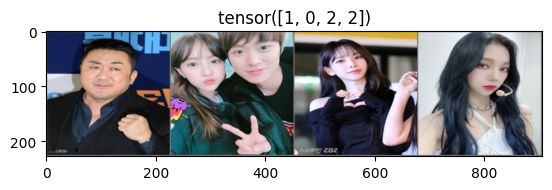

예측된 값 : tensor([0, 1, 1, 1]), 정답 : tensor([0, 1, 1, 1])


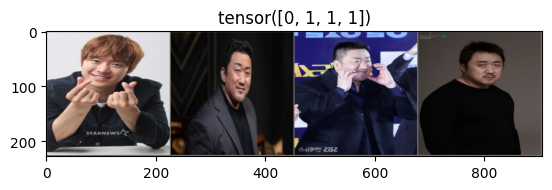

예측된 값 : tensor([2, 0, 0, 2]), 정답 : tensor([2, 0, 0, 2])


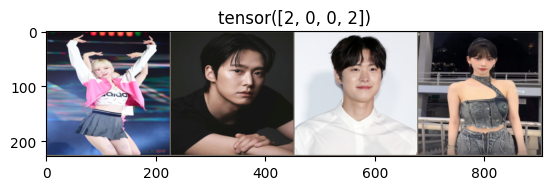

예측된 값 : tensor([1, 2, 1, 2]), 정답 : tensor([1, 2, 1, 2])


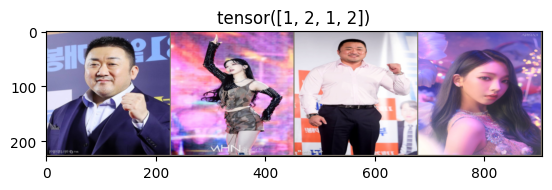

예측된 값 : tensor([2, 2, 1, 0]), 정답 : tensor([2, 2, 1, 0])


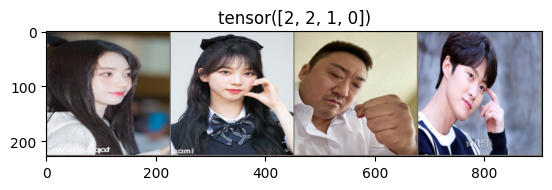

예측된 값 : tensor([2, 1, 1, 2]), 정답 : tensor([2, 0, 1, 2])


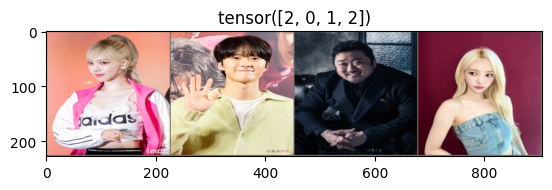

예측된 값 : tensor([0, 1, 1, 1]), 정답 : tensor([0, 1, 0, 1])


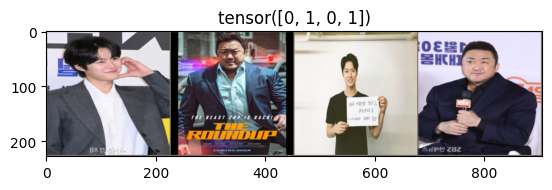

예측된 값 : tensor([0, 2]), 정답 : tensor([0, 0])


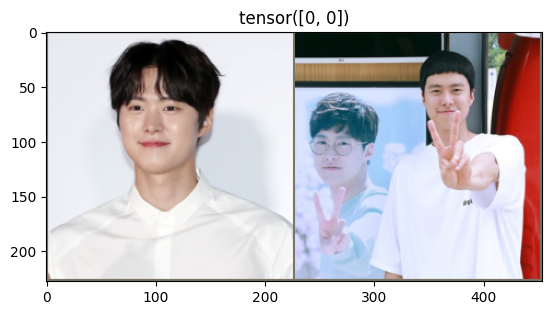

최종 정확도 : 0.8666666746139526


In [50]:
model.eval()
total_pred = 0

with torch.no_grad() :
    for data, label in test_dataloader :
        pred = model(data.to(device))       # [0.1, 6.3, -0.1]
        pred = torch.max(pred, 1)[1]        # [0, 1, 1, 2]

        total_pred += torch.sum(pred==label.to(device).data)

        print(f"예측된 값 : {pred}, 정답 : {label}")
        images_data = torchvision.utils.make_grid(data)     # 왜 틀렸는지 확인하기 위함
        imshow(images_data.to("cpu"), label)

print(f"최종 정확도 : {total_pred/len(test_datasets)}")

In [ ]:
# 정확도가 낮게 나왔다면
# 1. 내 데이터를 확인해보고
# 2. frozen 된 부분 풀어서 -> 모델 재학습

- 새로운 사진을 가져와서 테스트 해보기

In [54]:
from PIL import Image

image = Image.open("data/gong.jpg")
image = transforms_test(image).unsqueeze(0).to(device)

result = model(image)
result

tensor([[-1.3868,  0.3618, -2.2328]], grad_fn=<AddmmBackward0>)

### 4. 모델 저장

#### 1) torch.save(model.state_dict())

In [ ]:
# 가중치 값들만 저장 -> 이 방법을 더 많이 사용(저장용량이 적음)
torch.save(model.state_dict(), "model/myModel.pth")

#### 2) torch.save(model)

In [56]:
# 모델 통째로 저장
torch.save(model, "model/myModel1.pth")

In [ ]:
# https://www.kaggle.com/datasets/paultimothymooney/chest-xray-
# cnn 계열의 모델(vgg, resnet, .. 을 써서 학습시켜 최종결과 확인 -> 검증기반데이터셋(val)로 검증 : 정확도, f1 score 뽑기
# val = 8개 -> 배치사이즈 8개로 